# Exercise 3: Template Banks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess
import uuid
import time

In [2]:
base_cmd = "wsl" # can be empty for local use
exe_dir = "/mnt/c/Users/janhe/datalab/code/" # directory where the executable is found
output_dir = "/mnt/c/Users/janhe/datalab/solutions/exercise3/" # directory to save the data file
data_dir = "/mnt/c/Users/janhe/datalab/solutions/exercise3/" # directory for jupyter to find the data in

The function generate_source:

In [3]:
# Call generate source with given parameters
# Have some default values
def generate_source(
    outputFile=None, 
    sigma=0.25, 
    delta_T=None, 
    N=100000,
    f=0, 
    phi=0, 
    A=0, 
    r=0
):
    if delta_T == None : 
        delta_T = 1/N
    if outputFile == None:
        outputFile = "data_" + str(uuid.uuid4()) + ".csv"
    
    outputPath = os.path.join(output_dir, outputFile) # output_dir + "/" + "myfilename.csv"
    exe_path = os.path.join(exe_dir, 'generate_source')
    cmd_str = f"{base_cmd} {exe_path} -o {outputPath} -s {sigma} "\
        f"-d {delta_T} -N {N} -f {f} -p {phi} -a {A} -r {r}"
    
    # Optionally print the command line and test it outside the notebook
    #print(cmd_str)
    
    cmd = cmd_str.split(' ')
    process = subprocess.Popen(cmd,stdout=subprocess.PIPE)
    out, err = process.communicate()
    if err:
        print('The process raised an error:', err.decode())
    if out:
        print('The process has an output:', out.decode())

    return os.path.join(data_dir, outputFile)

The function prober:

In [4]:
def prober(inputFile, f=0, outputFile=None, phi=0, templateFile=None, mod=1):
    if outputFile == None:
        outputFile = "results_" + str(uuid.uuid4()) + ".csv"
    
    #path of the executable:
    exe_path = os.path.join(exe_dir, 'prober')
    
    #command line:
    cmd_str = f"{base_cmd} {exe_path} -i {output_dir}/{inputFile} "\
        f"-o {output_dir}/{outputFile} -m {mod}"
    
    if templateFile:
        cmd_str += f" -t {output_dir}/{templateFile} "
    else:
        cmd_str += f" -f {f} -p {phi}"
    
    # Optionally print the command line and test it outside the notebook
    # print(cmd_str)
    
    cmd = cmd_str.split(' ')
    process = subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE)
    out, err = process.communicate()
    if err:
        print('The process raised an error:', err.decode())
    if out:
        print('The process has an output:', out.decode())
    if os.path.isfile(outputFile):
        print(f"Output generated in file {outputFile}")

    return os.path.join(data_dir, outputFile)

## Task 1

Create the signals:

In [5]:
for i in range(11):
    for k in range(11):
        fr = 40+k*0.01
        ph = i*0.0005*np.pi
        generate_source(outputFile=f"data_{k}_{i}.csv",N=1000,f=fr,phi=ph,A=1)

Create the template bank:

In [6]:
num_f = 500
f_list_prober = np.linspace(0.2,100.0,num_f)
num_p = 200
p_list_prober = np.linspace(0,1.99*np.pi,num_p)

In [7]:
tb = 'tb.txt'
with open(tb,'w') as file:
    for p in p_list_prober:
        for f in f_list_prober:
            file.write("{0} {1}\n".format(f,p))

A function finding the maximum value for S1, i.e. the best match:

In [8]:
def findmax(infile, outfile):
    prober(inputFile=infile, outputFile=outfile, templateFile="tb.txt")
    results = np.loadtxt(outfile)
    values = results[:,2]
    # Find the maximum:
    #best = np.where(values == np.max(values))
    #freq = results[:,0][best][0]
    #phase = results[:,1][best][0]
    s = np.max(values) #values[best][0]
    return s

A list containing the mismatches for all signals:

In [10]:
mismatches = []

for i in range(11):
    for k in range(11):
        fr = 40+k*0.01
        ph = i*0.0005*np.pi
        with open(f"tb_{k}_{i}.txt",'w') as file:
            file.write("{0} {1}\n".format(fr,ph))
        prober(inputFile=f"data_{k}_{i}.csv", outputFile=f"s_correct_{k}_{i}.csv", templateFile=f"tb_{k}_{i}.txt")
        s_correct = np.loadtxt(f"s_correct_{k}_{i}.csv")[2]
        s_best = findmax(infile=f"data_{k}_{i}.csv", outfile=f"analyze_{k}_{i}.csv")
        mismatch = 1 - s_best/s_correct
        mismatches = np.append(mismatches, mismatch)

Output generated in file s_correct_0_0.csv
Output generated in file analyze_0_0.csv
Output generated in file s_correct_1_0.csv
Output generated in file analyze_1_0.csv
Output generated in file s_correct_2_0.csv
Output generated in file analyze_2_0.csv
Output generated in file s_correct_3_0.csv
Output generated in file analyze_3_0.csv
Output generated in file s_correct_4_0.csv
Output generated in file analyze_4_0.csv
Output generated in file s_correct_5_0.csv
Output generated in file analyze_5_0.csv
Output generated in file s_correct_6_0.csv
Output generated in file analyze_6_0.csv
Output generated in file s_correct_7_0.csv
Output generated in file analyze_7_0.csv
Output generated in file s_correct_8_0.csv
Output generated in file analyze_8_0.csv
Output generated in file s_correct_9_0.csv
Output generated in file analyze_9_0.csv
Output generated in file s_correct_10_0.csv
Output generated in file analyze_10_0.csv
Output generated in file s_correct_0_1.csv
Output generated in file analyz

Output generated in file analyze_9_8.csv
Output generated in file s_correct_10_8.csv
Output generated in file analyze_10_8.csv
Output generated in file s_correct_0_9.csv
Output generated in file analyze_0_9.csv
Output generated in file s_correct_1_9.csv
Output generated in file analyze_1_9.csv
Output generated in file s_correct_2_9.csv
Output generated in file analyze_2_9.csv
Output generated in file s_correct_3_9.csv
Output generated in file analyze_3_9.csv
Output generated in file s_correct_4_9.csv
Output generated in file analyze_4_9.csv
Output generated in file s_correct_5_9.csv
Output generated in file analyze_5_9.csv
Output generated in file s_correct_6_9.csv
Output generated in file analyze_6_9.csv
Output generated in file s_correct_7_9.csv
Output generated in file analyze_7_9.csv
Output generated in file s_correct_8_9.csv
Output generated in file analyze_8_9.csv
Output generated in file s_correct_9_9.csv
Output generated in file analyze_9_9.csv
Output generated in file s_correc

In [15]:
print(mismatches)

[ 0.00000000e+00  1.25641419e-04 -2.48020374e-04  1.74525678e-03
  1.69781341e-03  3.91917289e-03  5.55583585e-03  7.73964827e-03
  7.76832363e-03  9.88931551e-03  1.14944873e-02  4.02988563e-06
  1.44834828e-04 -1.36349874e-04  1.79662375e-03  1.07873325e-03
  1.80189189e-03  1.94423321e-03  7.82294490e-03  1.27849616e-02
  1.10051243e-02  1.51950570e-02 -4.48909491e-04 -9.93852031e-05
  8.88816737e-04  1.62308071e-03  1.97101727e-03  4.69502224e-03
  2.96114127e-03  4.87307137e-03  7.74394524e-03  1.37601542e-02
  1.35611191e-02  4.06026241e-05  8.55610717e-05  4.01844084e-04
  1.87566227e-03  2.88345671e-03  3.50302746e-03  5.10674795e-03
  9.46286932e-03  9.77175520e-03  1.31004367e-02  1.09168139e-02
  5.90619777e-05  2.29436046e-04  1.27172017e-04  7.12252114e-04
  3.27702335e-03  5.49440751e-03  4.48133442e-03  9.27161910e-03
  1.23277273e-02  1.39917431e-02  1.39260749e-02  2.41070352e-05
  1.35701221e-04  3.39495878e-04  6.82143206e-04  3.19465738e-03
  4.52381521e-03  4.50713

Convert the 1D array to a 2D array:

In [11]:
arr2d = np.reshape(mismatches, (11, 11))

In [12]:
print(arr2d)

[[ 0.00000000e+00  1.25641419e-04 -2.48020374e-04  1.74525678e-03
   1.69781341e-03  3.91917289e-03  5.55583585e-03  7.73964827e-03
   7.76832363e-03  9.88931551e-03  1.14944873e-02]
 [ 4.02988563e-06  1.44834828e-04 -1.36349874e-04  1.79662375e-03
   1.07873325e-03  1.80189189e-03  1.94423321e-03  7.82294490e-03
   1.27849616e-02  1.10051243e-02  1.51950570e-02]
 [-4.48909491e-04 -9.93852031e-05  8.88816737e-04  1.62308071e-03
   1.97101727e-03  4.69502224e-03  2.96114127e-03  4.87307137e-03
   7.74394524e-03  1.37601542e-02  1.35611191e-02]
 [ 4.06026241e-05  8.55610717e-05  4.01844084e-04  1.87566227e-03
   2.88345671e-03  3.50302746e-03  5.10674795e-03  9.46286932e-03
   9.77175520e-03  1.31004367e-02  1.09168139e-02]
 [ 5.90619777e-05  2.29436046e-04  1.27172017e-04  7.12252114e-04
   3.27702335e-03  5.49440751e-03  4.48133442e-03  9.27161910e-03
   1.23277273e-02  1.39917431e-02  1.39260749e-02]
 [ 2.41070352e-05  1.35701221e-04  3.39495878e-04  6.82143206e-04
   3.19465738e-03  

A contour plot of the mismatch depending on the differences of frequency and phase:

In [9]:
#Arrays with the differences between frequencies and phases of the signal and the nearest template:
x = np.linspace(0,0.1,11)
y = np.linspace(0,0.005*np.pi,11)

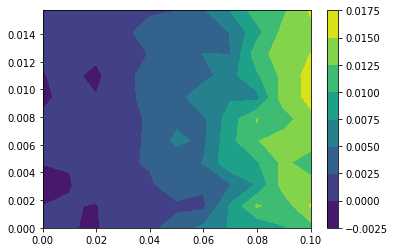

In [13]:
plt.contourf(x,y,arr2d)
plt.colorbar()

## Task 2

In [48]:
num_f = 500
f_list_prober = np.linspace(0.2,100,num_f)

In [49]:
tb_new = 'tb_new.txt'
with open(tb_new,'w') as file:
    for f in f_list_prober:
        file.write("{0} {1}\n".format(f,0))

In [50]:
generate_source(outputFile="data_random_01.csv",N=1000,r=1)

The process has an output: 867.707549
5.451884



'/mnt/c/Users/janhe/datalab/solutions/exercise3/data_random_01.csv'

In [51]:
prober(inputFile="data_random_01.csv", outputFile="analyze_random_01.csv", templateFile="tb_new.txt")

Output generated in file analyze_random_01.csv


'/mnt/c/Users/janhe/datalab/solutions/exercise3/analyze_random_01.csv'

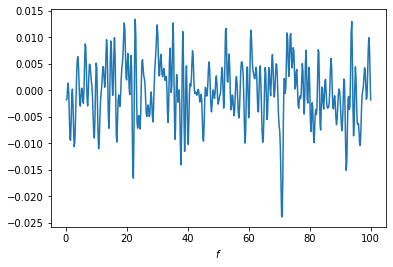

In [52]:
results_01 = np.loadtxt("analyze_random_01.csv")
values_01 = results_01[:,2]
plt.plot(results_01[:,0],values_01)
plt.xlabel('$f$')
plt.show()

In [53]:
prober(inputFile="data_0_0.csv", outputFile="new_analyze_0_0.csv", templateFile="tb_new.txt")

Output generated in file new_analyze_0_0.csv


'/mnt/c/Users/janhe/datalab/solutions/exercise3/new_analyze_0_0.csv'

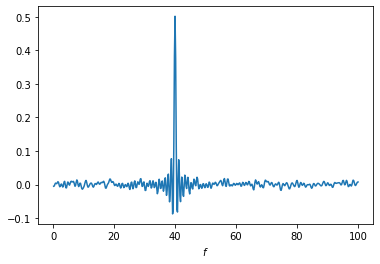

In [54]:
results_0_0 = np.loadtxt("new_analyze_0_0.csv")
values_0_0 = results_0_0[:,2]
plt.plot(results_0_0[:,0],values_0_0)
plt.xlabel('$f$')
plt.show()

(array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
         0.,  2.,  0.,  1.,  1.,  0.,  0.,  2.,  3.,  6.,  7.,  5.,  7.,
         9.,  6., 11.,  9., 16., 14.,  8., 24., 16., 15., 35., 31., 19.,
        26., 20., 16., 22., 22., 12., 21., 21., 21.,  7., 10.,  9.,  8.,
         7.,  2.,  3.,  6.,  5.,  4.,  1.,  3.,  2.]),
 array([-2.39253000e-02, -2.33133066e-02, -2.27013131e-02, -2.20893197e-02,
        -2.14773262e-02, -2.08653328e-02, -2.02533393e-02, -1.96413459e-02,
        -1.90293525e-02, -1.84173590e-02, -1.78053656e-02, -1.71933721e-02,
        -1.65813787e-02, -1.59693852e-02, -1.53573918e-02, -1.47453984e-02,
        -1.41334049e-02, -1.35214115e-02, -1.29094180e-02, -1.22974246e-02,
        -1.16854311e-02, -1.10734377e-02, -1.04614443e-02, -9.84945082e-03,
        -9.23745738e-03, -8.62546393e-03, -8.01347049e-03, -7.40147705e-03,
        -6.78948361e-03, -6.17749016e-03, -5.56549672e-03, -4.95350328e-03,
        -4.34150984e-03, -3.72951639e-03, -3.

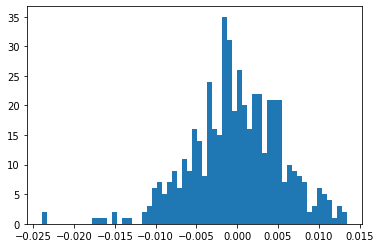

In [55]:
plt.hist(values_01,61)

(array([  2.,   2.,   0.,   2.,   0.,   5.,   3.,  32., 161., 229.,  47.,
          7.,   2.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([-0.0875766 , -0.07791838, -0.06826015, -0.05860193, -0.04894371,
        -0.03928549, -0.02962726, -0.01996904, -0.01031082, -0.00065259,
         0.00900563,  0.01866385,  0.02832208,  0.0379803 ,  0.04763852,
         0.05729674,  0.06695497,  0.07661319,  0.08627141,  0.09592964,
         0.10558786,  0.11524608,  0.1249043 ,  0.13456253,  0.14422075,
         0.15387897,  0.1635372 ,  0.17319542,  0.18285364,  0.19251187,
         0.20217009,  0.21182831,  0.22148653,  0.23114476,  0.24080298,
         0.2504612 ,  0.26011943,  0.26977765,  0.27943587,  0.2890941 ,


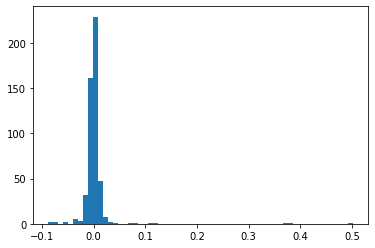

In [56]:
plt.hist(values_0_0,61)

In [14]:
for i in range(100):
    generate_source(outputFile=f"data_random_{i}.csv",sigma=20,N=1000,r=1)

The process has an output: 158.088334
0.992769

The process has an output: 158.088334
0.992769

The process has an output: 158.088334
0.992769

The process has an output: 158.088334
0.992769

The process has an output: 514.119163
3.230001

The process has an output: 514.119163
3.230001

The process has an output: 871.181139
5.473712

The process has an output: 871.181139
5.473712

The process has an output: 871.181139
5.473712

The process has an output: 871.181139
5.473712

The process has an output: 233.475276
1.466487

The process has an output: 233.475276
1.466487

The process has an output: 233.475276
1.466487

The process has an output: 587.996381
3.694231

The process has an output: 587.996381
3.694231

The process has an output: 587.996381
3.694231

The process has an output: 951.747475
5.979975

The process has an output: 951.747475
5.979975

The process has an output: 951.747475
5.979975

The process has an output: 312.768644
1.964752

The process has an output: 312.768644
1.

In [15]:
for i in range(100):
    prober(inputFile=f"data_random_{i}.csv", outputFile=f"analyze_random_{i}.csv", templateFile="tb_0_0.txt")

Output generated in file analyze_random_0.csv
Output generated in file analyze_random_1.csv
Output generated in file analyze_random_2.csv
Output generated in file analyze_random_3.csv
Output generated in file analyze_random_4.csv
Output generated in file analyze_random_5.csv
Output generated in file analyze_random_6.csv
Output generated in file analyze_random_7.csv
Output generated in file analyze_random_8.csv
Output generated in file analyze_random_9.csv
Output generated in file analyze_random_10.csv
Output generated in file analyze_random_11.csv
Output generated in file analyze_random_12.csv
Output generated in file analyze_random_13.csv
Output generated in file analyze_random_14.csv
Output generated in file analyze_random_15.csv
Output generated in file analyze_random_16.csv
Output generated in file analyze_random_17.csv
Output generated in file analyze_random_18.csv
Output generated in file analyze_random_19.csv
Output generated in file analyze_random_20.csv
Output generated in fil

In [16]:
for i in range(100):
    generate_source(outputFile=f"data_f40_{i}.csv",sigma=20,N=1000,f=40,A=2)

In [17]:
for i in range(100):
    prober(inputFile=f"data_f40_{i}.csv", outputFile=f"analyze_f40_{i}.csv", templateFile="tb_0_0.txt")

Output generated in file analyze_f40_0.csv
Output generated in file analyze_f40_1.csv
Output generated in file analyze_f40_2.csv
Output generated in file analyze_f40_3.csv
Output generated in file analyze_f40_4.csv
Output generated in file analyze_f40_5.csv
Output generated in file analyze_f40_6.csv
Output generated in file analyze_f40_7.csv
Output generated in file analyze_f40_8.csv
Output generated in file analyze_f40_9.csv
Output generated in file analyze_f40_10.csv
Output generated in file analyze_f40_11.csv
Output generated in file analyze_f40_12.csv
Output generated in file analyze_f40_13.csv
Output generated in file analyze_f40_14.csv
Output generated in file analyze_f40_15.csv
Output generated in file analyze_f40_16.csv
Output generated in file analyze_f40_17.csv
Output generated in file analyze_f40_18.csv
Output generated in file analyze_f40_19.csv
Output generated in file analyze_f40_20.csv
Output generated in file analyze_f40_21.csv
Output generated in file analyze_f40_22.cs

In [18]:
list_random = np.zeros(100)
list_f40 = np.zeros(100)

for i in range(100):
    result_random = np.loadtxt(f"analyze_random_{i}.csv")
    list_random[i] = result_random[2]
    result_f40 = np.loadtxt(f"analyze_f40_{i}.csv")
    list_f40[i] = result_f40[2]

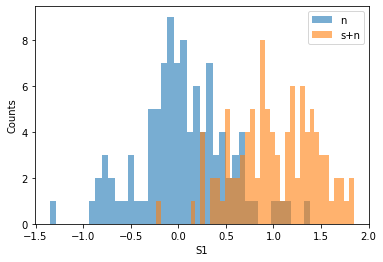

In [21]:
plt.hist(list_random,40,alpha=0.6,label="n")
plt.hist(list_f40,40,alpha=0.6,label="s+n")
plt.xlabel("S1")
plt.ylabel("Counts")
plt.legend()
plt.show()

In [22]:
list_fp = []
list_tp = []
a = len(list_random)

for t in np.linspace(-2,2,101):
    b = len(np.where(list_random >= t)[0])
    list_fp = np.append(list_fp, b/a)
    c = len(np.where(list_f40 >= t)[0])
    list_tp = np.append(list_tp, c/a)

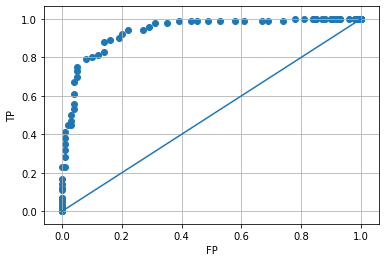

In [25]:
plt.scatter(list_fp, list_tp)
plt.plot([0,1])
plt.xlabel("FP")
plt.ylabel("TP")
plt.grid()
plt.show()

In [5]:
for i in range(100):
    generate_source(outputFile=f"data_random_s5_{i}.csv",sigma=5,N=1000,r=1)

The process has an output: 292.999313
1.840525

The process has an output: 292.999313
1.840525

The process has an output: 292.999313
1.840525

The process has an output: 292.999313
1.840525

The process has an output: 150.281697
0.943714

The process has an output: 150.281697
0.943714

The process has an output: 150.281697
0.943714

The process has an output: 150.281697
0.943714

The process has an output: 150.281697
0.943714

The process has an output: 150.281697
0.943714

The process has an output: 150.281697
0.943714

The process has an output: 9.402919
0.058458

The process has an output: 9.402919
0.058458

The process has an output: 9.402919
0.058458

The process has an output: 9.402919
0.058458

The process has an output: 9.402919
0.058458

The process has an output: 9.402919
0.058458

The process has an output: 9.402919
0.058458

The process has an output: 9.402919
0.058458

The process has an output: 367.900645
2.311191

The process has an output: 367.900645
2.311191

The proc

In [6]:
for i in range(100):
    prober(inputFile=f"data_random_s5_{i}.csv", outputFile=f"analyze_random_s5_{i}.csv", templateFile="tb_0_0.txt")

Output generated in file analyze_random_s5_0.csv
Output generated in file analyze_random_s5_1.csv
Output generated in file analyze_random_s5_2.csv
Output generated in file analyze_random_s5_3.csv
Output generated in file analyze_random_s5_4.csv
Output generated in file analyze_random_s5_5.csv
Output generated in file analyze_random_s5_6.csv
Output generated in file analyze_random_s5_7.csv
Output generated in file analyze_random_s5_8.csv
Output generated in file analyze_random_s5_9.csv
Output generated in file analyze_random_s5_10.csv
Output generated in file analyze_random_s5_11.csv
Output generated in file analyze_random_s5_12.csv
Output generated in file analyze_random_s5_13.csv
Output generated in file analyze_random_s5_14.csv
Output generated in file analyze_random_s5_15.csv
Output generated in file analyze_random_s5_16.csv
Output generated in file analyze_random_s5_17.csv
Output generated in file analyze_random_s5_18.csv
Output generated in file analyze_random_s5_19.csv
Output gen

In [7]:
for i in range(100):
    generate_source(outputFile=f"data_f40_s5_{i}.csv",sigma=5,N=1000,f=40,A=2)

In [8]:
for i in range(100):
    prober(inputFile=f"data_f40_s5_{i}.csv", outputFile=f"analyze_f40_s5_{i}.csv", templateFile="tb_0_0.txt")

Output generated in file analyze_f40_s5_0.csv
Output generated in file analyze_f40_s5_1.csv
Output generated in file analyze_f40_s5_2.csv
Output generated in file analyze_f40_s5_3.csv
Output generated in file analyze_f40_s5_4.csv
Output generated in file analyze_f40_s5_5.csv
Output generated in file analyze_f40_s5_6.csv
Output generated in file analyze_f40_s5_7.csv
Output generated in file analyze_f40_s5_8.csv
Output generated in file analyze_f40_s5_9.csv
Output generated in file analyze_f40_s5_10.csv
Output generated in file analyze_f40_s5_11.csv
Output generated in file analyze_f40_s5_12.csv
Output generated in file analyze_f40_s5_13.csv
Output generated in file analyze_f40_s5_14.csv
Output generated in file analyze_f40_s5_15.csv
Output generated in file analyze_f40_s5_16.csv
Output generated in file analyze_f40_s5_17.csv
Output generated in file analyze_f40_s5_18.csv
Output generated in file analyze_f40_s5_19.csv
Output generated in file analyze_f40_s5_20.csv
Output generated in fil

In [9]:
list_random_s5 = np.zeros(100)
list_f40_s5 = np.zeros(100)

for i in range(100):
    result_random_s5 = np.loadtxt(f"analyze_random_s5_{i}.csv")
    list_random_s5[i] = result_random_s5[2]
    result_f40_s5 = np.loadtxt(f"analyze_f40_s5_{i}.csv")
    list_f40_s5[i] = result_f40_s5[2]

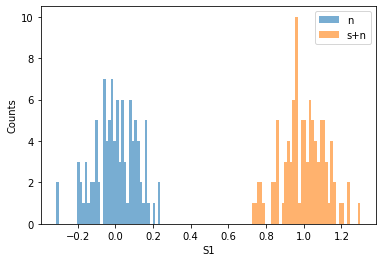

In [11]:
plt.hist(list_random_s5,40,alpha=0.6,label="n")
plt.hist(list_f40_s5,40,alpha=0.6,label="s+n")
plt.xlabel("S1")
plt.ylabel("Counts")
plt.legend()
plt.show()

In [12]:
list_fp_s5 = []
list_tp_s5 = []
a = len(list_random_s5)

for t in np.linspace(-0.5,1.5,101):
    b = len(np.where(list_random_s5 >= t)[0])
    list_fp_s5 = np.append(list_fp_s5, b/a)
    c = len(np.where(list_f40_s5 >= t)[0])
    list_tp_s5 = np.append(list_tp_s5, c/a)

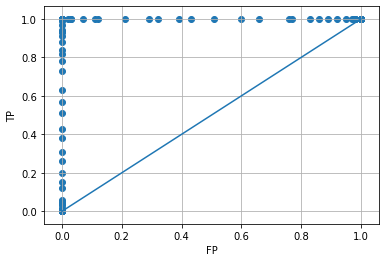

In [13]:
plt.scatter(list_fp_s5, list_tp_s5)
plt.plot([0,1])
plt.xlabel("FP")
plt.ylabel("TP")
plt.grid()
plt.show()

## Task 3

In [5]:
def findmaxnew(infile, outfile, tb):
    prober(inputFile=infile, outputFile=outfile, templateFile=tb)
    results = np.loadtxt(outfile)
    values = results[:,2]
    # Find the maximum:
    s = np.max(values)
    best = np.where(values == s)
    freq = results[:,0][best][0]
    phase = results[:,1][best][0]
    return freq, phase, s, values

In [6]:
def findsignal(infile, outfile, tb, threshold):
    freq, phase, s, values = findmaxnew(infile, outfile, tb)
    if s > threshold:
        print(f"There is a signal with frequency {freq} and phase {phase}. S1={s}.")
    else:
        print("There is no signal.")
    return len(values[np.where(values >= threshold)])

In [7]:
for k in [1000,2000,3000,4000,5000]:
    tb_k = f"tb_{k}.txt"
    with open(tb_k,'w') as file:
        for p in np.linspace(0,1.9*np.pi,20):
            for f in np.linspace(1000/k,1000,k):
                file.write("{0} {1}\n".format(f,p))

In [8]:
for i in [2,5,10,20]:
    for j in [1,2]:
        generate_source(f"data_task3_{i}_{j}.csv", N=1000, sigma=i, A=j, r=1)
        time.sleep(1)

The process has an output: 936.667637
5.885217

The process has an output: 798.989670
5.020074

The process has an output: 9.947617
0.061881

The process has an output: 369.194533
2.319321

The process has an output: 87.403550
0.548599

The process has an output: 946.725272
5.948417

The process has an output: 802.261161
5.040631

The process has an output: 519.925446
3.266486



In [9]:
findsignal(infile="data_task3_5_1.csv", outfile="analyze_task3_test.csv", tb="tb_1000.txt", threshold=0.5)

Output generated in file analyze_task3_test.csv
There is no signal.


0

In [10]:
findsignal(infile="data_task3_5_2.csv", outfile="analyze_task3_test.csv", tb="tb_1000.txt", threshold=1)

Output generated in file analyze_task3_test.csv
There is no signal.


0

In [11]:
findsignal(infile="data_task3_20_1.csv", outfile="analyze_task3_test.csv", tb="tb_1000.txt", threshold=1)

Output generated in file analyze_task3_test.csv
There is a signal with frequency 392.0 and phase 3.14159. S1=1.70198.


230

In [12]:
findsignal(infile="data_task3_20_2.csv", outfile="analyze_task3_test.csv", tb="tb_1000.txt", threshold=1)

Output generated in file analyze_task3_test.csv
There is a signal with frequency 151.0 and phase 2.51327. S1=1.48009.


198

In [13]:
for k in [1000,3000,5000]:
    for t in np.linspace(0,1,11):
        for i in [2,5,10,20]:
            for j in [1,2]:
                findsignal(infile=f"data_task3_{i}_{j}.csv",outfile=f"analyze_task_3_s{i}_a{j}_tb{k}_th{t}.csv",tb=f"tb_{k}.txt",threshold=t)

Output generated in file analyze_task_3_s2_a1_tb1000_th0.0.csv
There is a signal with frequency 937.0 and phase 4.71239. S1=0.454764.
Output generated in file analyze_task_3_s2_a2_tb1000_th0.0.csv
There is a signal with frequency 799.0 and phase 5.02655. S1=0.9944.
Output generated in file analyze_task_3_s5_a1_tb1000_th0.0.csv
There is a signal with frequency 10.0 and phase 5.96903. S1=0.427732.
Output generated in file analyze_task_3_s5_a2_tb1000_th0.0.csv
There is a signal with frequency 369.0 and phase 3.14159. S1=0.897747.
Output generated in file analyze_task_3_s10_a1_tb1000_th0.0.csv
There is a signal with frequency 272.0 and phase 5.65487. S1=0.8087.
Output generated in file analyze_task_3_s10_a2_tb1000_th0.0.csv
There is a signal with frequency 53.0 and phase 4.39823. S1=1.14156.
Output generated in file analyze_task_3_s20_a1_tb1000_th0.0.csv
There is a signal with frequency 392.0 and phase 3.14159. S1=1.70198.
Output generated in file analyze_task_3_s20_a2_tb1000_th0.0.csv
The

There is a signal with frequency 53.0 and phase 4.39823. S1=1.14156.
Output generated in file analyze_task_3_s20_a1_tb1000_th0.7000000000000001.csv
There is a signal with frequency 392.0 and phase 3.14159. S1=1.70198.
Output generated in file analyze_task_3_s20_a2_tb1000_th0.7000000000000001.csv
There is a signal with frequency 151.0 and phase 2.51327. S1=1.48009.
Output generated in file analyze_task_3_s2_a1_tb1000_th0.8.csv
There is no signal.
Output generated in file analyze_task_3_s2_a2_tb1000_th0.8.csv
There is a signal with frequency 799.0 and phase 5.02655. S1=0.9944.
Output generated in file analyze_task_3_s5_a1_tb1000_th0.8.csv
There is no signal.
Output generated in file analyze_task_3_s5_a2_tb1000_th0.8.csv
There is a signal with frequency 369.0 and phase 3.14159. S1=0.897747.
Output generated in file analyze_task_3_s10_a1_tb1000_th0.8.csv
There is a signal with frequency 272.0 and phase 5.65487. S1=0.8087.
Output generated in file analyze_task_3_s10_a2_tb1000_th0.8.csv
Ther

Output generated in file analyze_task_3_s20_a1_tb3000_th0.4.csv
There is a signal with frequency 607.667 and phase 0.942478. S1=1.94862.
Output generated in file analyze_task_3_s20_a2_tb3000_th0.4.csv
There is a signal with frequency 56.6667 and phase 0.314159. S1=1.91649.
Output generated in file analyze_task_3_s2_a1_tb3000_th0.5.csv
There is a signal with frequency 936.667 and phase 5.65487. S1=0.538206.
Output generated in file analyze_task_3_s2_a2_tb3000_th0.5.csv
There is a signal with frequency 799.0 and phase 5.02655. S1=0.9944.
Output generated in file analyze_task_3_s5_a1_tb3000_th0.5.csv
There is no signal.
Output generated in file analyze_task_3_s5_a2_tb3000_th0.5.csv
There is a signal with frequency 369.0 and phase 3.14159. S1=0.897747.
Output generated in file analyze_task_3_s10_a1_tb3000_th0.5.csv
There is a signal with frequency 272.0 and phase 5.65487. S1=0.8087.
Output generated in file analyze_task_3_s10_a2_tb3000_th0.5.csv
There is a signal with frequency 53.3333 and

There is a signal with frequency 56.6 and phase 0.628319. S1=1.92512.
Output generated in file analyze_task_3_s2_a1_tb5000_th0.2.csv
There is a signal with frequency 63.4 and phase 3.45575. S1=0.53601.
Output generated in file analyze_task_3_s2_a2_tb5000_th0.2.csv
There is a signal with frequency 799.0 and phase 5.02655. S1=0.9944.
Output generated in file analyze_task_3_s5_a1_tb5000_th0.2.csv
There is a signal with frequency 10.0 and phase 5.96903. S1=0.427732.
Output generated in file analyze_task_3_s5_a2_tb5000_th0.2.csv
There is a signal with frequency 369.2 and phase 2.51327. S1=0.929681.
Output generated in file analyze_task_3_s10_a1_tb5000_th0.2.csv
There is a signal with frequency 272.0 and phase 5.65487. S1=0.8087.
Output generated in file analyze_task_3_s10_a2_tb5000_th0.2.csv
There is a signal with frequency 53.2 and phase 4.08407. S1=1.23663.
Output generated in file analyze_task_3_s20_a1_tb5000_th0.2.csv
There is a signal with frequency 392.2 and phase 2.51327. S1=1.94085.

Output generated in file analyze_task_3_s20_a1_tb5000_th0.9.csv
There is a signal with frequency 392.2 and phase 2.51327. S1=1.94085.
Output generated in file analyze_task_3_s20_a2_tb5000_th0.9.csv
There is a signal with frequency 56.6 and phase 0.628319. S1=1.92512.
Output generated in file analyze_task_3_s2_a1_tb5000_th1.0.csv
There is no signal.
Output generated in file analyze_task_3_s2_a2_tb5000_th1.0.csv
There is no signal.
Output generated in file analyze_task_3_s5_a1_tb5000_th1.0.csv
There is no signal.
Output generated in file analyze_task_3_s5_a2_tb5000_th1.0.csv
There is no signal.
Output generated in file analyze_task_3_s10_a1_tb5000_th1.0.csv
There is no signal.
Output generated in file analyze_task_3_s10_a2_tb5000_th1.0.csv
There is a signal with frequency 53.2 and phase 4.08407. S1=1.23663.
Output generated in file analyze_task_3_s20_a1_tb5000_th1.0.csv
There is a signal with frequency 392.2 and phase 2.51327. S1=1.94085.
Output generated in file analyze_task_3_s20_a2_tb